# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:100%; font-family: 'Arial Black', Arial, sans-serif; text-shadow: 2px 2px 5px rgba(0,0,0,0.7); background-color:#75F2FF; overflow:hidden; box-shadow:0 2px 5px rgba(0, 0, 0, 0.3); color:white;"><b>🔧Import Libraries</b></div>

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("crest")

# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:100%; font-family: 'Arial Black', Arial, sans-serif; text-shadow: 2px 2px 5px rgba(0,0,0,0.7); background-color:#75F2FF; overflow:hidden; box-shadow:0 2px 5px rgba(0, 0, 0, 0.3); color:white;"><b>📂 Reading the data</b></div>

In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s6e1/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s6e1/test.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/playground-series-s6e1/train.csv'

In [ ]:
df_train = df_train.drop("id", axis=1)

In [ ]:
print("- The train set's shape is",df_train.shape[0], "rows and", df_train.shape[1], "columns.")
print("- The test set's shape is",df_test.shape[0], "rows and", df_test.shape[1], "columns.")

- The train set's shape is 630000 rows and 12 columns.
- The test set's shape is 270000 rows and 12 columns.


In [ ]:
TARGET = 'exam_score'
categorical_features = df_train.select_dtypes('object').columns.to_list()
numerical_features = (df_train.select_dtypes(include=['int', 'float']).columns.drop(TARGET).tolist())

# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:100%; font-family: 'Arial Black', Arial, sans-serif; text-shadow: 2px 2px 5px rgba(0,0,0,0.7); background-color:#75F2FF; overflow:hidden; box-shadow:0 2px 5px rgba(0, 0, 0, 0.3); color:white;"><b> Check missing values and duplicates</b></div>

## Numerical Features

In [ ]:
print('Missing values count:', df_train[numerical_features].isnull().sum().sum(), '\n')
print('Duplicate count:', df_train.duplicated().sum(), '\n')

print("Unique values")
print(df_train[numerical_features].nunique(),'\n')

print("Sample of numerical data")
df_train[numerical_features].head(3)

Missing values count: 0 

Duplicate count: 0 

Unique values
age                   8
study_hours         792
class_attendance    617
sleep_hours          66
dtype: int64 

Sample of numerical data


,age,study_hours,class_attendance,sleep_hours
0,21,7.91,98.8,4.9
1,18,4.95,94.8,4.7
2,20,4.68,92.6,5.8


## Categorical Features

In [ ]:
print('Missing values count:', df_train[categorical_features].isnull().sum().sum(), '\n')

print("Unique values")
print(df_train[categorical_features].nunique(),'\n')

print("Sample of categorical data")
df_train[categorical_features].head(3)

Missing values count: 0 

Unique values
gender             3
course             7
internet_access    2
sleep_quality      3
study_method       5
facility_rating    3
exam_difficulty    3
dtype: int64 

Sample of categorical data


,gender,course,internet_access,sleep_quality,study_method,facility_rating,exam_difficulty
0,female,b.sc,no,average,online videos,low,easy
1,other,diploma,yes,poor,self-study,medium,moderate
2,female,b.sc,yes,poor,coaching,high,moderate


In [ ]:
print('Duplicate count:', df_train.duplicated().sum(), '\n')

Duplicate count: 0 



# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:100%; font-family: 'Arial Black', Arial, sans-serif; text-shadow: 2px 2px 5px rgba(0,0,0,0.7); background-color:#75F2FF; overflow:hidden; box-shadow:0 2px 5px rgba(0, 0, 0, 0.3); color:white;"><b> Univariate EDA</b></div>

## Target Distribution

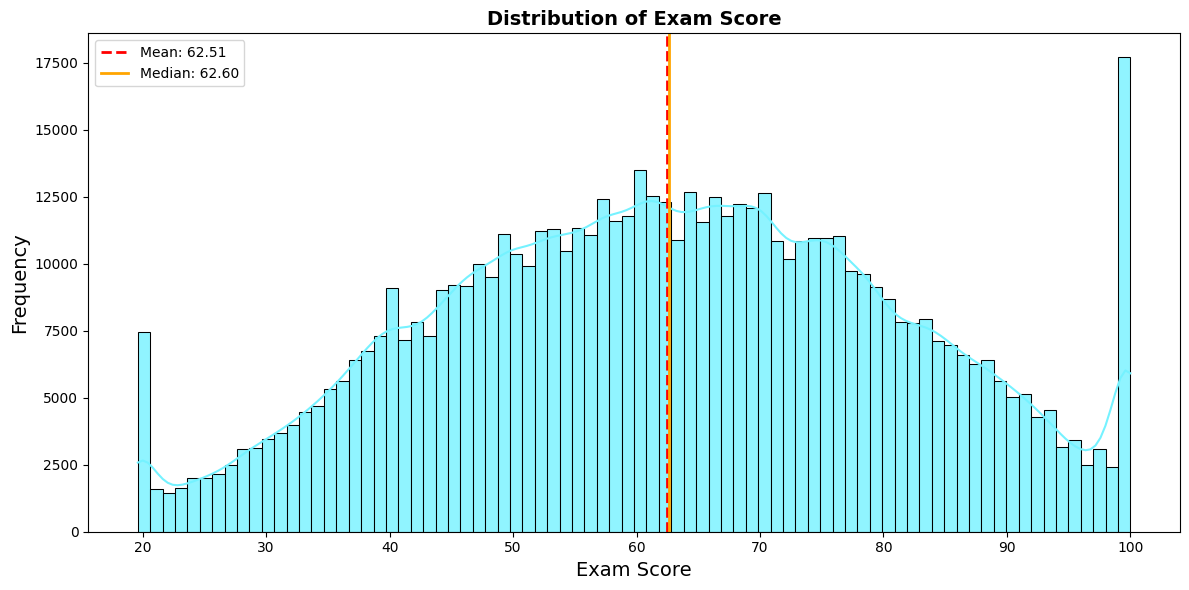

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_train['exam_score'], kde=True, bins=80, color='#75F2FF', edgecolor='black', alpha=0.8)
plt.title('Distribution of Exam Score', fontsize=14, fontweight='bold')
plt.xlabel('Exam Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(df_train['exam_score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_train["exam_score"].mean():.2f}')
plt.axvline(df_train['exam_score'].median(), color='orange', linestyle='-', linewidth=2, label=f'Median: {df_train["exam_score"].median():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

## Distribution of Numerical Features

In [ ]:
df_train[numerical_features].describe()

,age,study_hours,class_attendance,sleep_hours
count,630000.000000,630000.000000,630000.000000,630000.000000
mean,20.545821,4.002337,71.987261,7.072758
std,2.260238,2.359880,17.430098,1.744811
min,17.000000,0.080000,40.600000,4.100000
25%,19.000000,1.970000,57.000000,5.600000
50%,21.000000,4.000000,72.600000,7.100000
75%,23.000000,6.050000,87.200000,8.600000
max,24.000000,7.910000,99.400000,9.900000


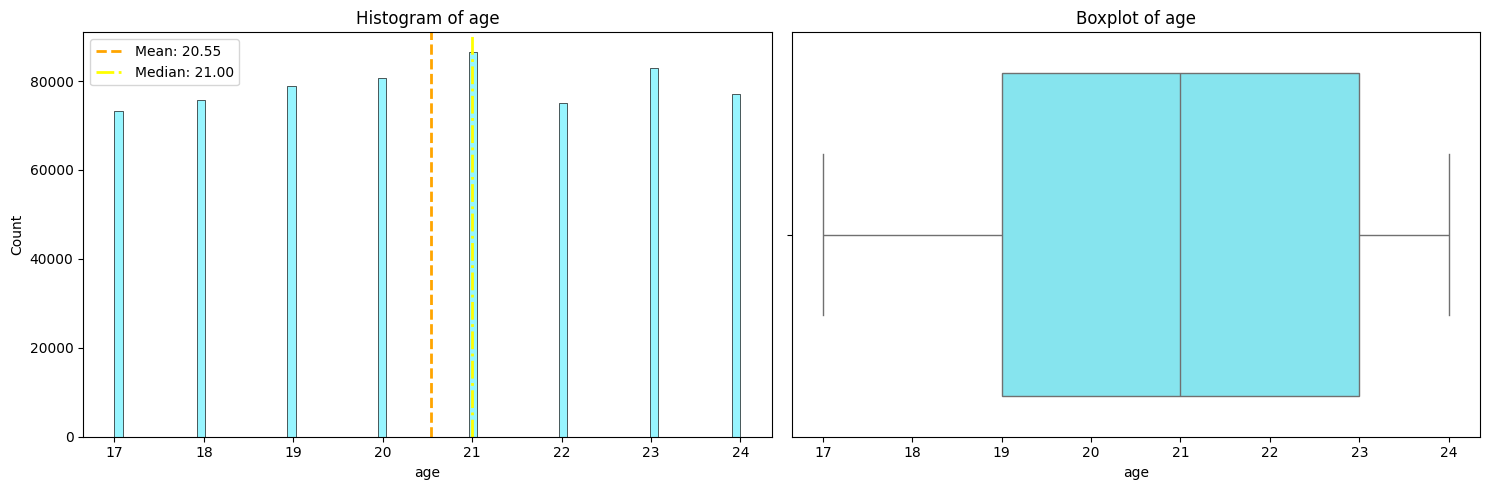

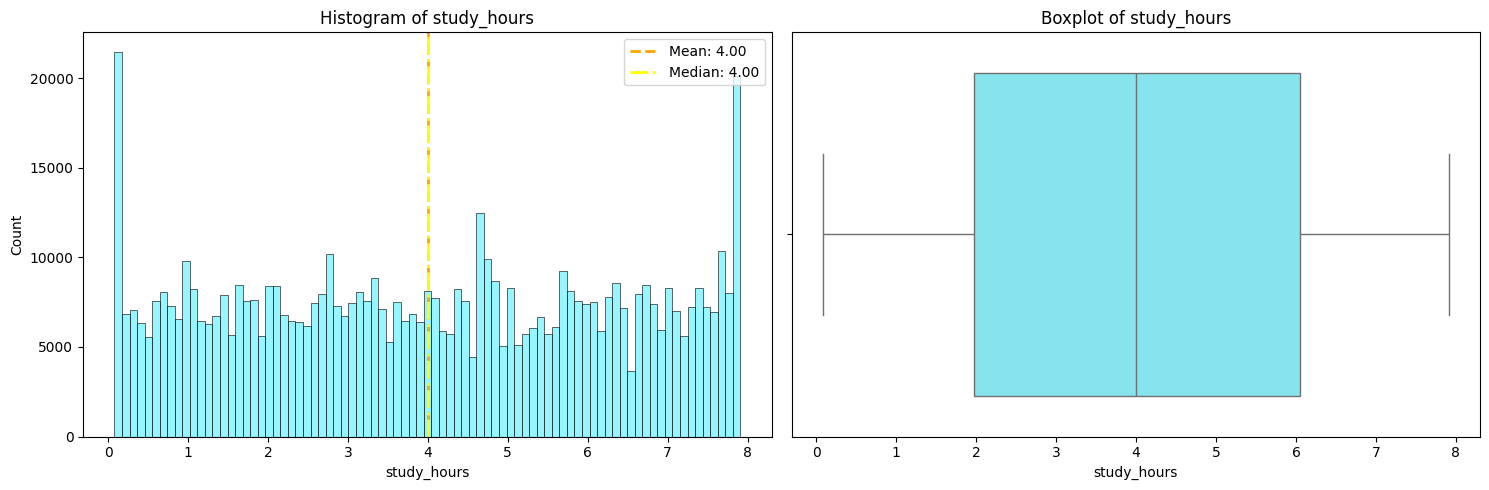

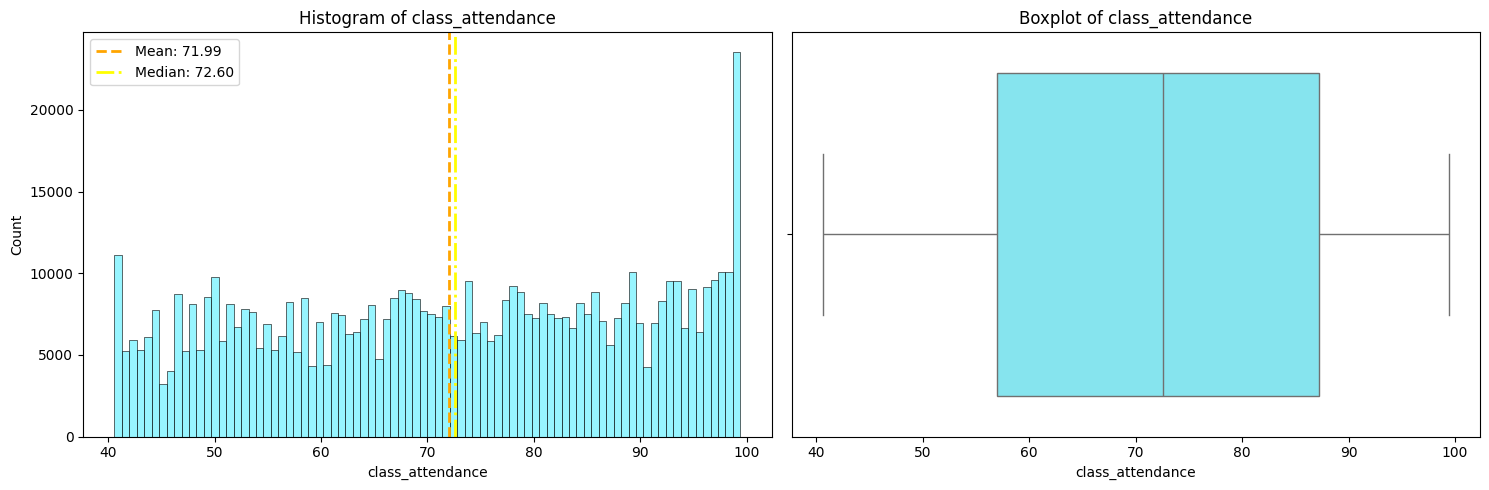

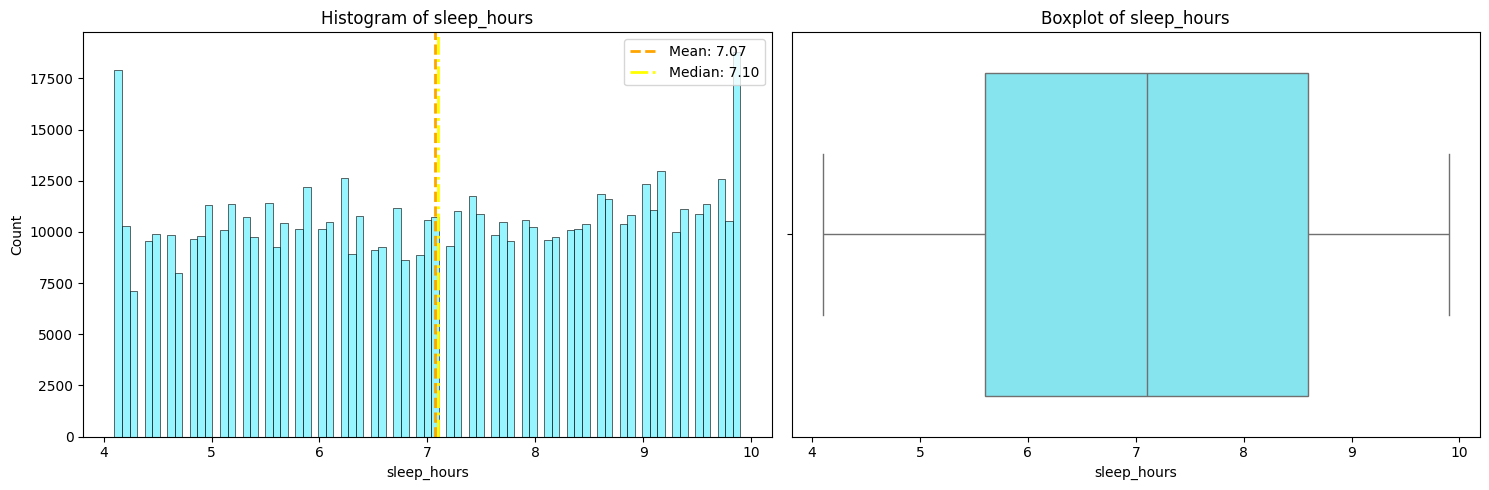

In [ ]:
for column in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    sns.histplot(data=df_train, x=column, ax=axes[0], color='#75F2FF')
    mean_value = df_train[column].mean()
    median_value = df_train[column].median()
    axes[0].axvline(mean_value, color='orange', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
    axes[0].axvline(median_value, color='yellow', linestyle='-.', linewidth=2, label=f'Median: {median_value:.2f}')
    axes[0].set_title(f'Histogram of {column}')
    axes[0].legend()

    sns.boxplot(data=df_train, x=column, ax=axes[1], color='#75F2FF')
    axes[1].set_title(f'Boxplot of {column}')

    plt.tight_layout()
plt.show()

## Distribution of Categorical Features

In [ ]:
df_train[categorical_features].describe()

,gender,course,internet_access,sleep_quality,study_method,facility_rating,exam_difficulty
count,630000,630000,630000,630000,630000,630000,630000
unique,3,7,2,3,5,3,3
top,other,b.tech,yes,poor,coaching,medium,moderate
freq,211097,131236,579423,213675,131697,214082,353982


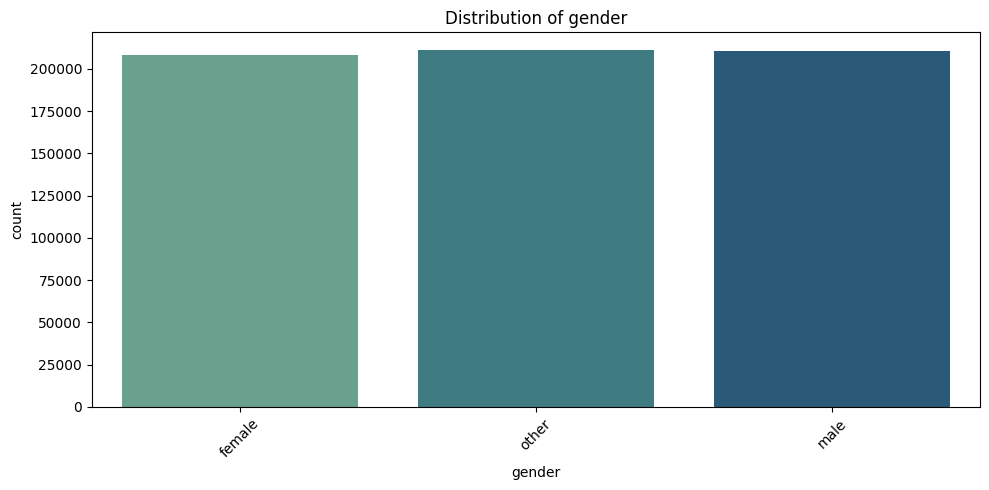

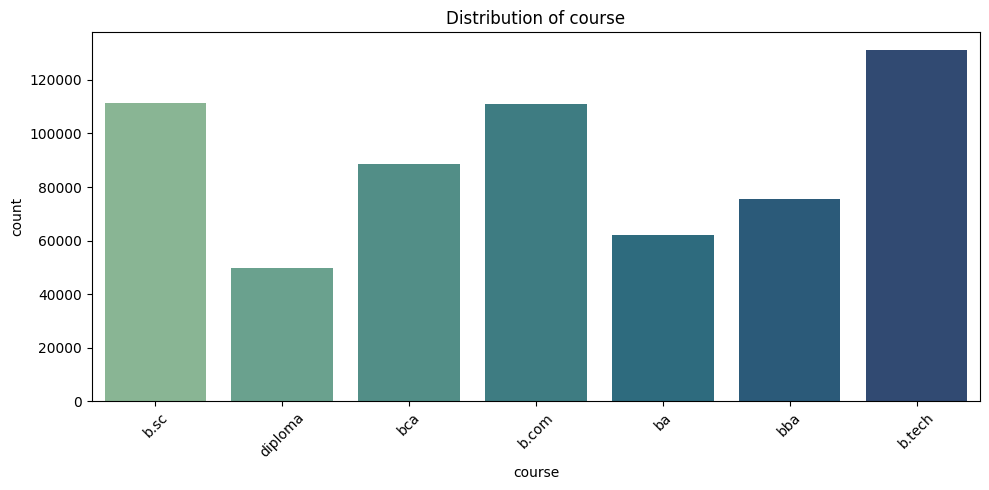

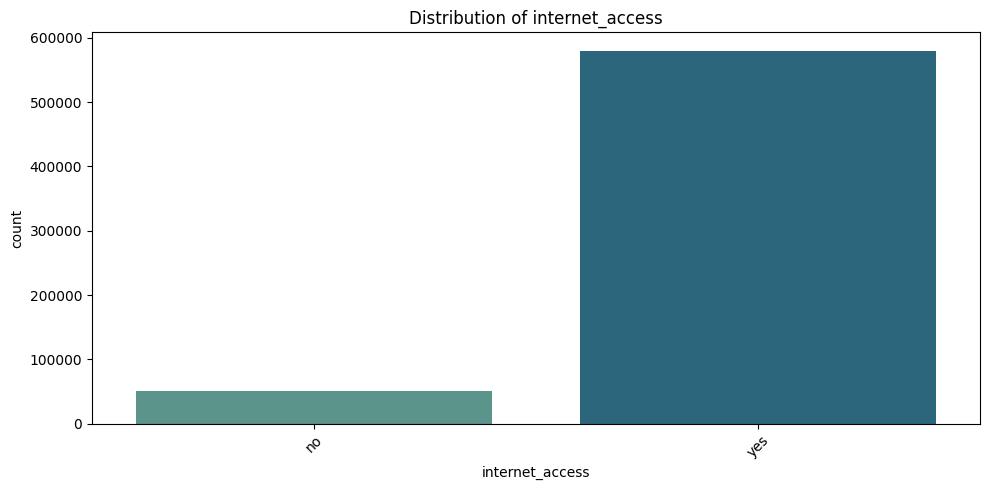

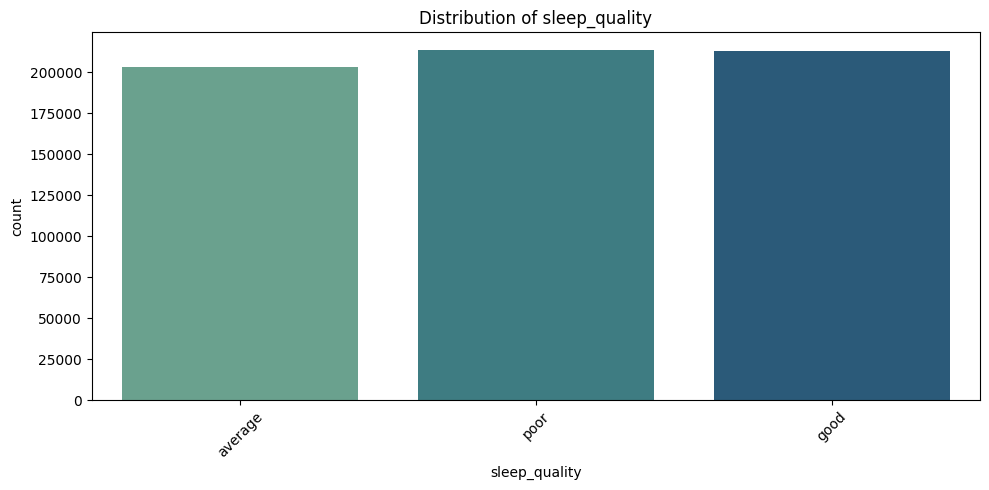

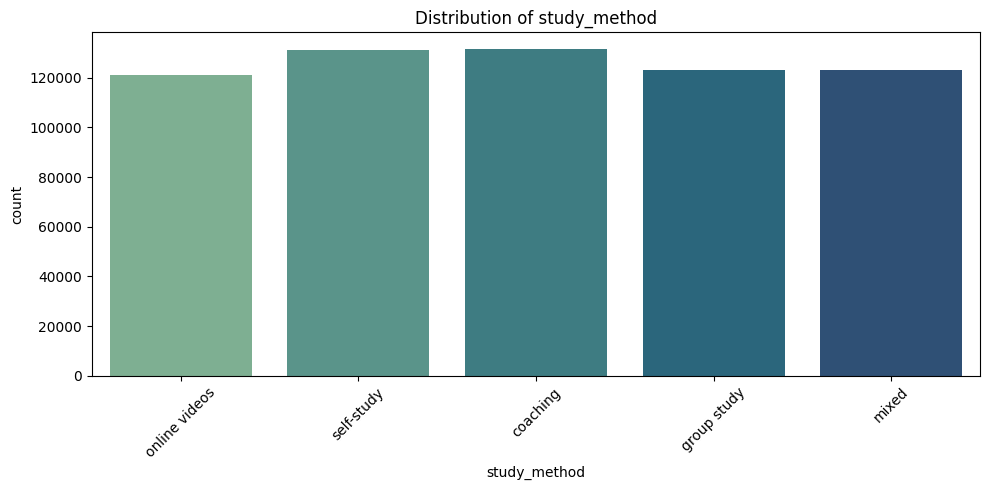

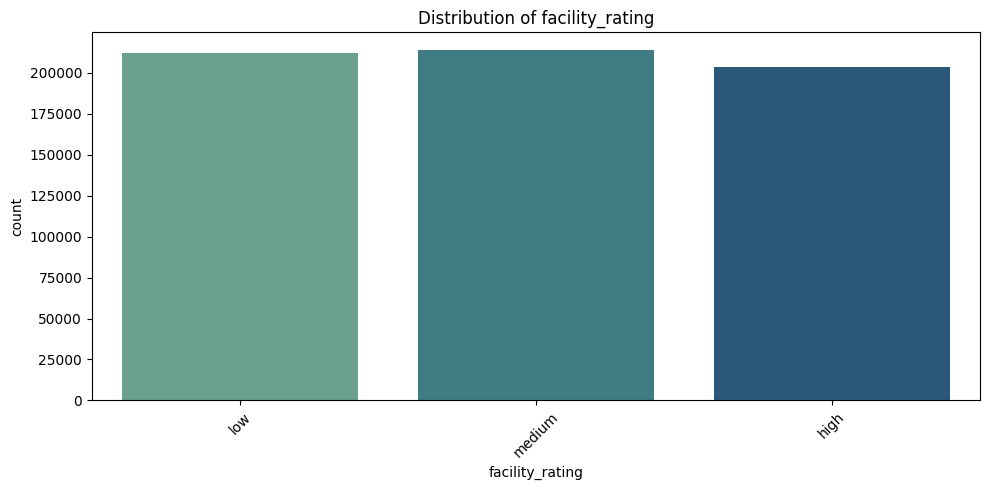

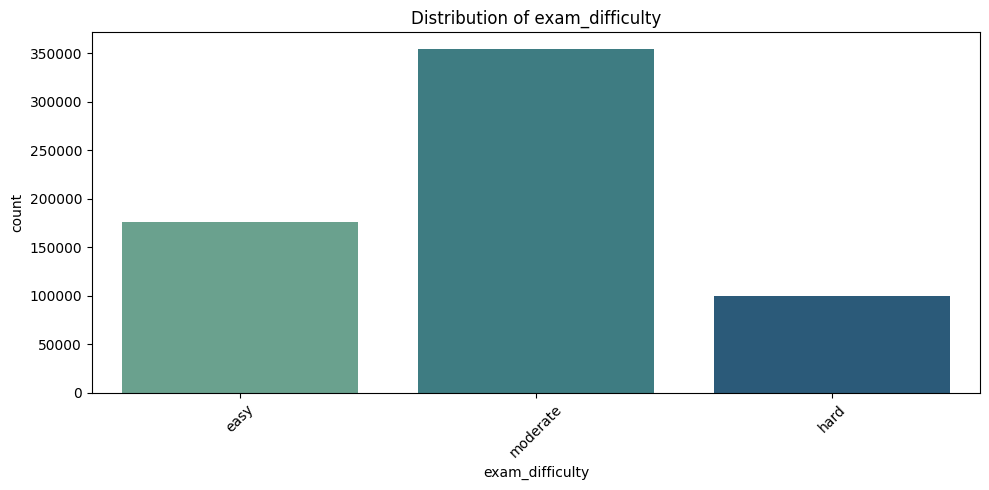

In [ ]:
for column in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_train, x=column, palette="crest")
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:100%; font-family: 'Arial Black', Arial, sans-serif; text-shadow: 2px 2px 5px rgba(0,0,0,0.7); background-color:#75F2FF; overflow:hidden; box-shadow:0 2px 5px rgba(0, 0, 0, 0.3); color:white;"><b> Outliers Analysis</b></div>

In [ ]:
for col in numerical_features:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{col}: Lower bound = {lower_bound:.2f}, Upper bound = {upper_bound:.2f}")
    outliers = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)]
    print(f"Number of outliers in {col}: {outliers.shape[0]}\n")

age: Lower bound = 13.00, Upper bound = 29.00
Number of outliers in age: 0

study_hours: Lower bound = -4.15, Upper bound = 12.17
Number of outliers in study_hours: 0

class_attendance: Lower bound = 11.70, Upper bound = 132.50
Number of outliers in class_attendance: 0

sleep_hours: Lower bound = 1.10, Upper bound = 13.10
Number of outliers in sleep_hours: 0



**No outliers were detected using the IQR method.**

# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:100%; font-family: 'Arial Black', Arial, sans-serif; text-shadow: 2px 2px 5px rgba(0,0,0,0.7); background-color:#75F2FF; overflow:hidden; box-shadow:0 2px 5px rgba(0, 0, 0, 0.3); color:white;"><b> Multivariate EDA</b></div>

## Linear Feature Correlation Matrix

In [ ]:
df_train.corr(numeric_only=True)

,age,study_hours,class_attendance,sleep_hours,exam_score
age,1.000000,0.007545,0.005628,0.005864,0.010472
study_hours,0.007545,1.000000,0.087617,0.042491,0.762267
class_attendance,0.005628,0.087617,1.000000,0.029263,0.360954
sleep_hours,0.005864,0.042491,0.029263,1.000000,0.167410
exam_score,0.010472,0.762267,0.360954,0.167410,1.000000


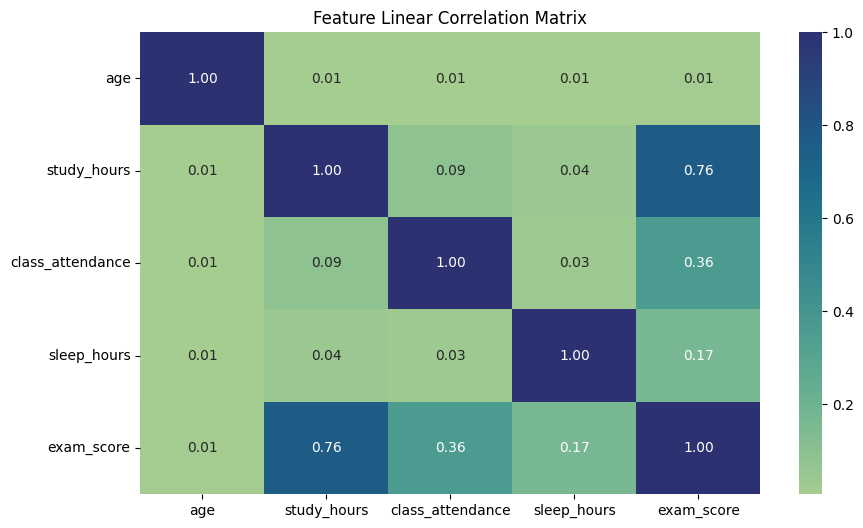

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_train.corr(numeric_only=True), annot=True,fmt='.2f', cmap='crest')
plt.title("Feature Linear Correlation Matrix")
plt.show()

**Correlation Analysis – Key Points**

- Study hours correlate strongly with exam score (0.76) → the main driver of performance.

- Class attendance has a moderate positive effect (0.36).

- Sleep hours show a weak positive effect (0.17).

- Age is nearly uncorrelated (0.01).

**Insight** : Student performance is mostly influenced by study habits and attendance, rather than age or other factors.

## Pairplot of Numerical Features vs Exam Score

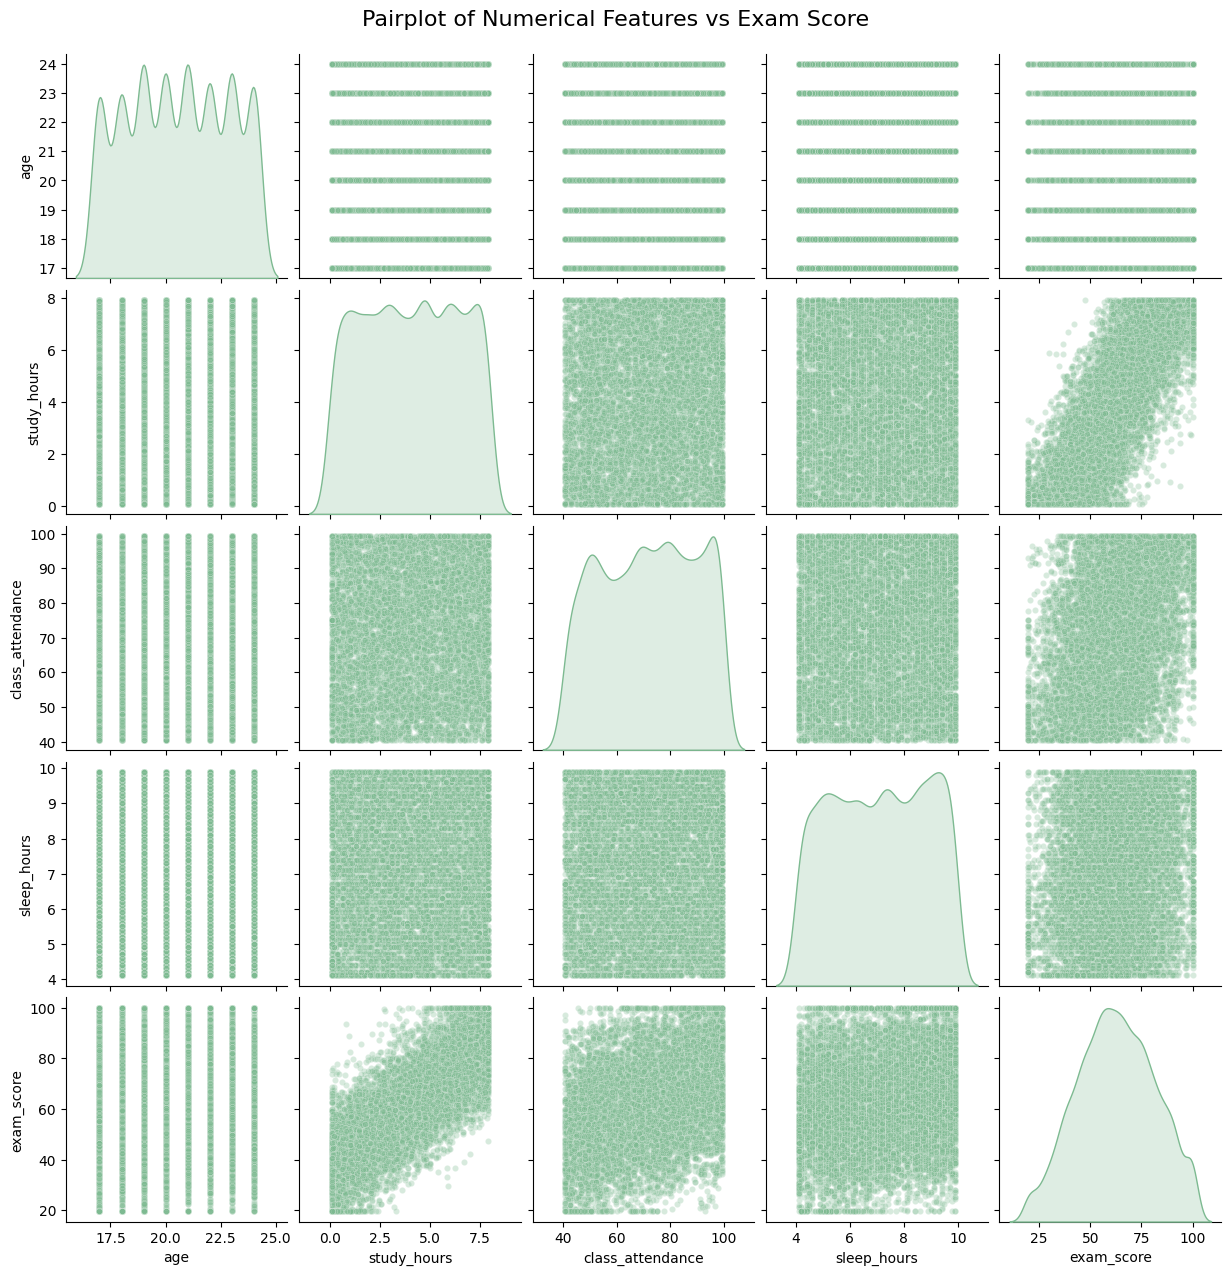

In [ ]:
df_sample = df_train.sample(n=10000, random_state=42)

sns.pairplot(df_sample, diag_kind='kde', kind='scatter', plot_kws={'alpha':0.3, 's':20}, diag_kws={'shade':True})
plt.suptitle('Pairplot of Numerical Features vs Exam Score', fontsize=16, y=1.02)
plt.show()

## How Categorical Features affect Exam Scores

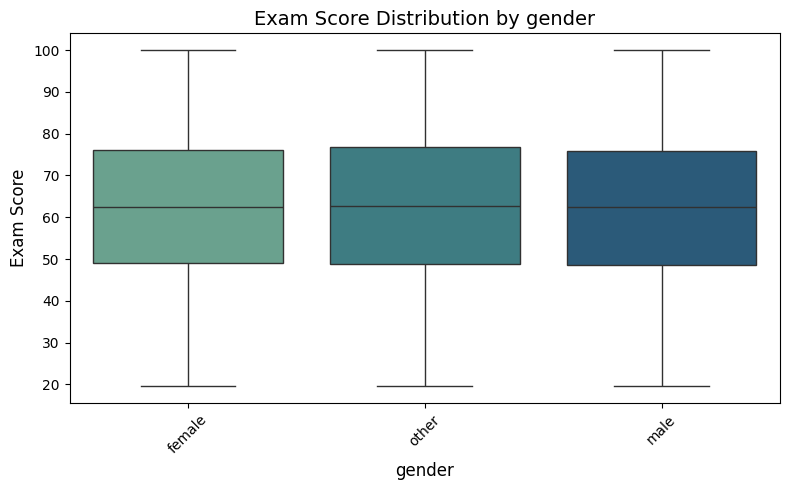

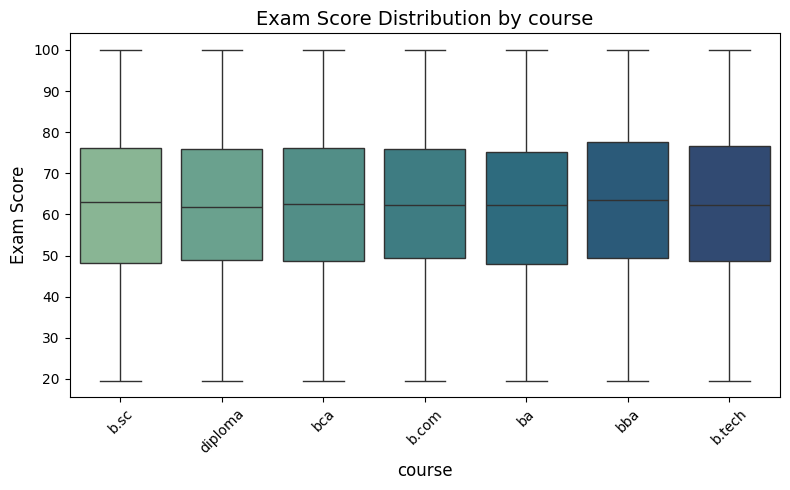

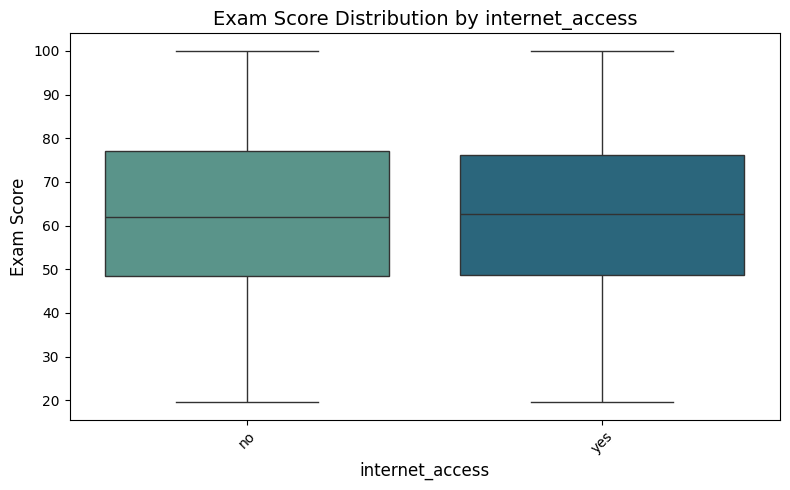

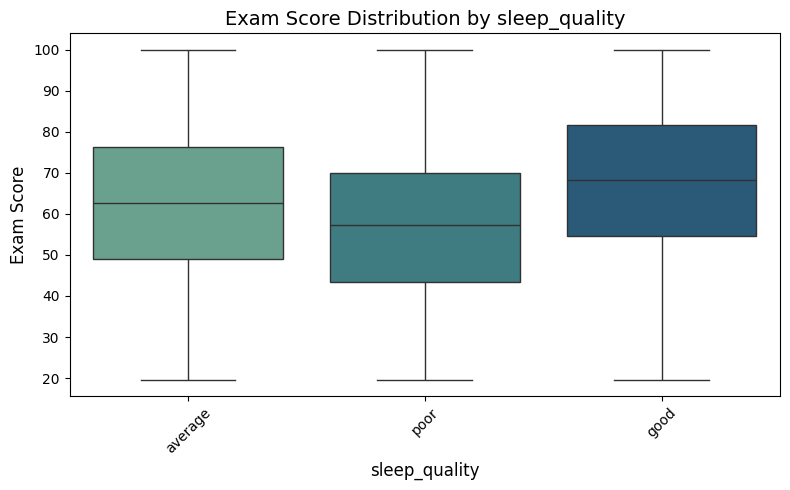

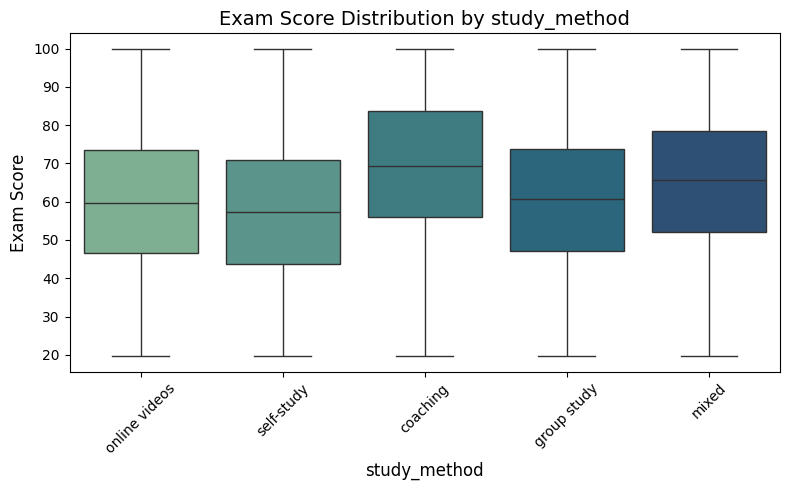

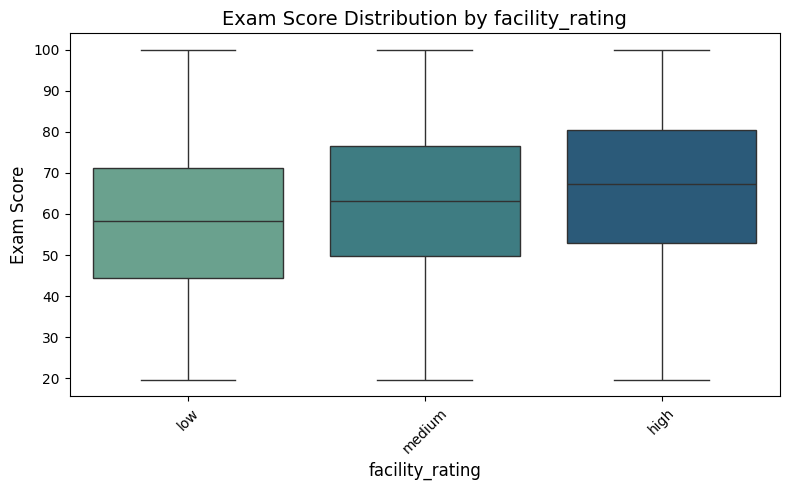

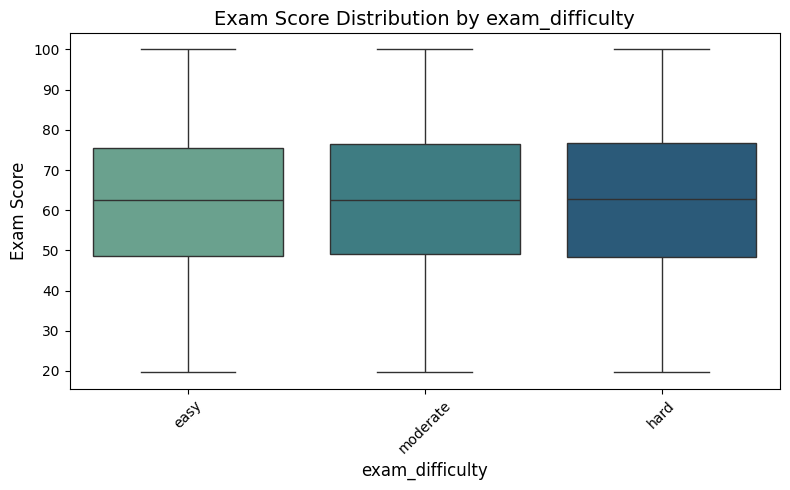

In [ ]:
for col in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=col, y='exam_score', data=df_train, palette='crest')
    plt.title(f'Exam Score Distribution by {col}', fontsize=14)
    plt.ylabel('Exam Score', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()